In [6]:
import numpy as np
import pandas as pd
import scipy
import datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
import nltk

# from wordcloud import WordCloud, STOPWORDS
# from scipy.misc import imread
import imageio
%matplotlib inline

import time
import csv
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
from nltk.book import *
# import gensim.summarization
plt.style.use('fivethirtyeight')

sns.set(color_codes=True)

# session 0 - import dataset

In [117]:
patient_df=pd.read_csv("/Users/yaunqiaoying/Desktop/patien_info_clean.csv")

In [190]:
patient_df.dropna(how='all')[:3]

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Male with has more 10% more confirmed case than women 

In [191]:
patient_df['sex']=patient_df['sex'].str.lower()
sex_grouped=patient_df.groupby(patient_df['sex']).size()[1:]
sex_grouped

sex
female    556
male      707
dtype: int64

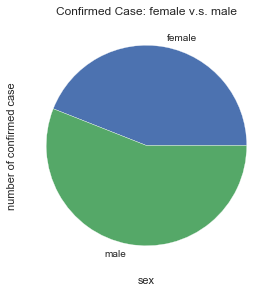

In [192]:

plt.style.use('seaborn')
plt.figure(figsize=(4,10))
plt.subplot(2,1,1)
sex_grouped.plot(kind='pie')
plt.xlabel('sex')
plt.ylabel('number of confirmed case')
plt.title('Confirmed Case: female v.s. male')
plt.show()



##  The age group with most confirmed case: 40-50

In [193]:
age_df = patient_df[patient_df['age'].notnull()]
age_df=age_df[age_df['age'].map(len)<3]

In [194]:
age_df['age_']=age_df['age'].apply(lambda x:int(str(x)[:2]))


In [195]:
grouped=age_df.groupby(pd.cut(age_df["age_"], np.arange(0, 100, 10))).size()

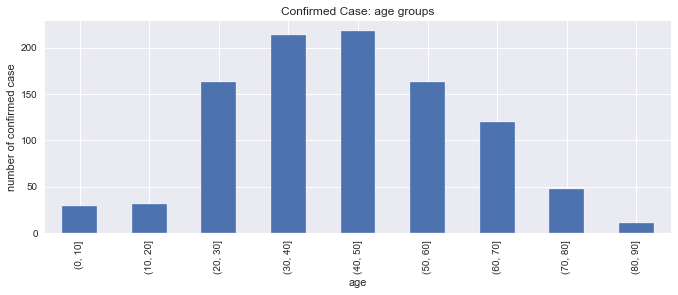

In [196]:
plt.style.use('seaborn')
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
grouped.plot(kind='bar')
plt.xlabel('age')
plt.ylabel('number of confirmed case')
plt.title('Confirmed Case: age groups')
plt.show()

## As the mojarity of case is located in China, Hubei is the largest provinces with msot cases, followed by Guangdong, Zhejiang

In [197]:
geo_df=pd.read_csv('/Users/yaunqiaoying/Downloads/novel-corona-virus-2019-dataset/geo.csv')
geo_df.head()


,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


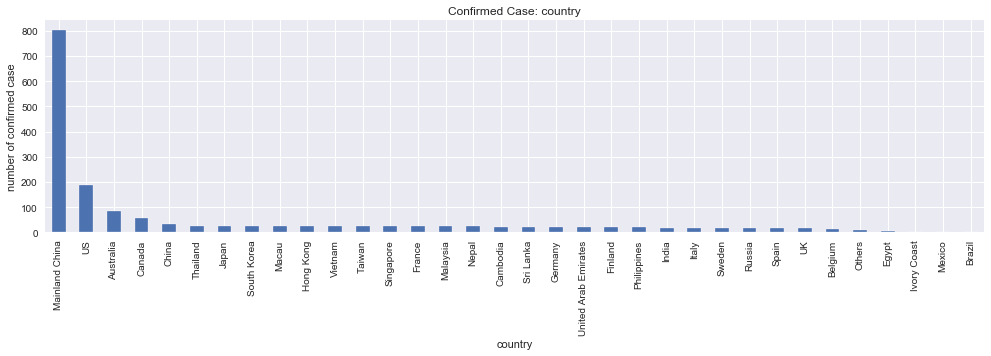

In [198]:
grouped=geo_df.groupby(geo_df['Country']).size().sort_values(ascending=False)

plt.style.use('seaborn')
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
grouped.plot(kind='bar')
plt.xlabel('country')
plt.ylabel('number of confirmed case')
plt.title('Confirmed Case: country')
plt.show()

In [199]:
china_df=geo_df[geo_df['Country']=='Mainland China']
grouped=china_df.groupby(china_df['Province/State']).sum().sort_values('Confirmed',ascending=False)
del grouped['Sno']


<Figure size 2160x576 with 0 Axes>

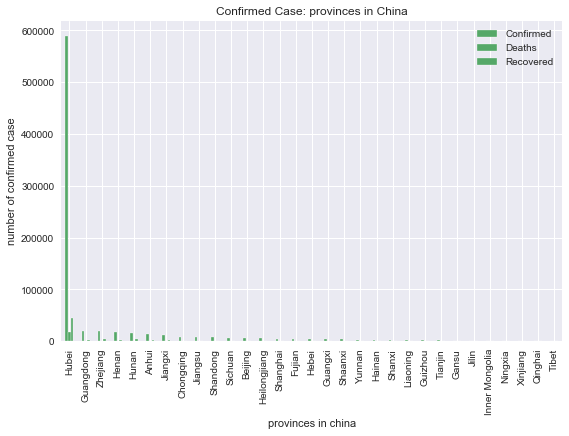

In [202]:
plt.style.use('seaborn')
plt.figure(figsize=(30,8))
grouped.plot(kind='bar',color="G")
plt.xlabel('provinces in china')
plt.ylabel('number of confirmed case')
plt.title('Confirmed Case: provinces in China')
plt.show()

In [ ]:
##look at the trend within each local area


In [204]:
timeseries_df=pd.read_csv('/Users/yaunqiaoying/Downloads/novel-corona-virus-2019-dataset/timeseries.csv')

In [205]:
timeseries_df[:5]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [208]:
area_list=list(timeseries_df['Province/State'])

In [209]:
 enumerate(area_list)

In [210]:
# from matplotlib.ticker import FuncFormatter
# COL_NUM = 4
# ROW_NUM = 5
# fig,axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

# for i, ele in enumerate(area_list):
#     ax = axes[int(i/COL_NUM), i%COL_NUM]
#     ele_trend_ratio = df[df[ele]==1].groupby(df['year']).size() / len(df[df[ele]==1])
#     ele_trend_ratio.plot(kind='barh',ax=ax)
#     ax.set_title(ele[6:])

# plt.tight_layout()